In [19]:
#Imports
import re
import string
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.initializers import RandomNormal

## Question 1 & 2

In [20]:
input_file_path = "Harry potter lab dataset.txt"
input_test = "harryTest.txt"

# Function to clean and split text
def clean_and_split_text(file_path):
    # Read the text file
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    
    # Remove punctuation (including speech marks)
    text = re.sub(r'[^\w\s]', '', text.lower())
    
    # Split text by whitespace
    words = text.split()
    
    return words

# Get the cleaned and split words
words = clean_and_split_text(input_file_path)
testWords = clean_and_split_text(input_test)

print(words)
# print(testWords)

['he', 'found', 'it', 'a', 'lot', 'harder', 'to', 'concentrate', 'on', 'drills', 'that', 'afternoon', 'and', 'when', 'he', 'left', 'the', 'building', 'at', 'five', 'oclock', 'he', 'was', 'still', 'so', 'worried', 'that', 'he', 'walked', 'straight', 'into', 'someone', 'just', 'outside', 'the', 'door', 'sorry', 'he', 'grunted', 'as', 'the', 'tiny', 'old', 'man', 'stumbled', 'and', 'almost', 'fell', 'it', 'was', 'a', 'few', 'seconds', 'before', 'mr', 'dursley', 'realized', 'that', 'the', 'man', 'was', 'wearing', 'a', 'violet', 'cloak', 'he', 'didnt', 'seem', 'at', 'all', 'upset', 'at', 'being', 'almost', 'knocked', 'to', 'the', 'ground', 'on', 'the', 'contrary', 'his', 'face', 'split', 'into', 'a', 'wide', 'smile', 'and', 'he', 'said', 'in', 'a', 'squeaky', 'voice', 'that', 'made', 'passersby', 'stare', 'dont', 'be', 'sorry', 'my', 'dear', 'sir', 'for', 'nothing', 'could', 'upset', 'me', 'today', 'rejoice', 'for', 'you', 'knowwho', 'has', 'gone', 'at', 'last', 'even', 'muggles', 'like', '

In [21]:
len(words)

298

In [22]:
sum(pd.Series(words).duplicated())

127

## Question 3

In [23]:
words_series = pd.Series(words)
unique_words = words_series.drop_duplicates().tolist()
print(unique_words)

words_series_test = pd.Series(testWords)
unique_words_test = words_series_test.drop_duplicates().tolist()

['he', 'found', 'it', 'a', 'lot', 'harder', 'to', 'concentrate', 'on', 'drills', 'that', 'afternoon', 'and', 'when', 'left', 'the', 'building', 'at', 'five', 'oclock', 'was', 'still', 'so', 'worried', 'walked', 'straight', 'into', 'someone', 'just', 'outside', 'door', 'sorry', 'grunted', 'as', 'tiny', 'old', 'man', 'stumbled', 'almost', 'fell', 'few', 'seconds', 'before', 'mr', 'dursley', 'realized', 'wearing', 'violet', 'cloak', 'didnt', 'seem', 'all', 'upset', 'being', 'knocked', 'ground', 'contrary', 'his', 'face', 'split', 'wide', 'smile', 'said', 'in', 'squeaky', 'voice', 'made', 'passersby', 'stare', 'dont', 'be', 'my', 'dear', 'sir', 'for', 'nothing', 'could', 'me', 'today', 'rejoice', 'you', 'knowwho', 'has', 'gone', 'last', 'even', 'muggles', 'like', 'yourself', 'should', 'celebrating', 'this', 'happy', 'day', 'hugged', 'around', 'middle', 'off', 'stood', 'rooted', 'spot', 'had', 'been', 'by', 'complete', 'stranger', 'also', 'thought', 'called', 'muggle', 'whatever', 'rattled'

In [24]:
sum(pd.Series(unique_words).duplicated())

0

In [25]:
len(unique_words)

171

## Question 4

In [26]:
def one_hot_vectors(words):
    # Create a dictionary to map each
    # unique word to an index
    word_to_index = {}
    for i, word in enumerate(words):
        word_to_index[word] = i
    
    # Create one-hot encoded vectors for
    # each word in the corpus
    one_hot_vectors = []
    for word in words:
        vector = np.zeros(len(words))
        vector[word_to_index[word]] = 1
        one_hot_vectors.append(vector)

    return one_hot_vectors

In [27]:
encoded_words = one_hot_vectors(unique_words)

In [28]:
encoded_words

[array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [29]:
len(encoded_words)

171

## QUESTION 5

In [30]:
def create_context_dataset(words, window_size=2):
    context_pairs = []

    for i in range(window_size, len(words) - window_size):
        input_word = words[i]
        context_words = words[i - window_size:i] + words[i + 1:i + 1 + window_size]

        for context_word in context_words:
            context_pairs.append((input_word, context_word))
    
    return context_pairs

context_pairs = create_context_dataset(words)
context_test = create_context_dataset(testWords)

for pair in context_pairs:
    print(f"Input (Central Word): {pair[0]}, Label (Context Word): {pair[1]}")

Input (Central Word): it, Label (Context Word): he
Input (Central Word): it, Label (Context Word): found
Input (Central Word): it, Label (Context Word): a
Input (Central Word): it, Label (Context Word): lot
Input (Central Word): a, Label (Context Word): found
Input (Central Word): a, Label (Context Word): it
Input (Central Word): a, Label (Context Word): lot
Input (Central Word): a, Label (Context Word): harder
Input (Central Word): lot, Label (Context Word): it
Input (Central Word): lot, Label (Context Word): a
Input (Central Word): lot, Label (Context Word): harder
Input (Central Word): lot, Label (Context Word): to
Input (Central Word): harder, Label (Context Word): a
Input (Central Word): harder, Label (Context Word): lot
Input (Central Word): harder, Label (Context Word): to
Input (Central Word): harder, Label (Context Word): concentrate
Input (Central Word): to, Label (Context Word): lot
Input (Central Word): to, Label (Context Word): harder
Input (Central Word): to, Label (Conte

## Question 6

In [31]:
vocab_size = len(unique_words)
word_to_index = {word: idx for idx, word in enumerate(unique_words)}

# Prepare training data
def word_to_one_hot(word, word_to_index, vocab_size):
    one_hot_vector = np.zeros(vocab_size)
    one_hot_vector[word_to_index[word]] = 1
    return one_hot_vector

X_train = []
y_train = []

for input_word, context_word in context_pairs:
    X_train.append(word_to_one_hot(input_word, word_to_index, vocab_size))
    y_train.append(word_to_one_hot(context_word, word_to_index, vocab_size))

X_train = np.array(X_train)
y_train = np.array(y_train)

# Define the model with small random Gaussian weights
initializer = RandomNormal(mean=0.0, stddev=0.05)  # small random values

model = Sequential([
    Input(shape=(vocab_size,)),
    Dense(200, activation='linear', kernel_initializer=initializer),  # Linear hidden layer
    Dense(vocab_size, activation='softmax', kernel_initializer=initializer)  # Output layer
])

# Compile the model with a large learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

history.history


Epoch 1/50
37/37 - 3s - 76ms/step - accuracy: 0.0578 - loss: 4.9621
Epoch 2/50
37/37 - 0s - 3ms/step - accuracy: 0.0808 - loss: 4.2383
Epoch 3/50
37/37 - 0s - 3ms/step - accuracy: 0.0986 - loss: 3.4802
Epoch 4/50
37/37 - 0s - 3ms/step - accuracy: 0.0884 - loss: 3.0951
Epoch 5/50
37/37 - 0s - 3ms/step - accuracy: 0.0918 - loss: 2.9712
Epoch 6/50
37/37 - 0s - 3ms/step - accuracy: 0.0884 - loss: 2.9339
Epoch 7/50
37/37 - 0s - 3ms/step - accuracy: 0.0842 - loss: 2.9256
Epoch 8/50
37/37 - 0s - 3ms/step - accuracy: 0.0782 - loss: 2.8966
Epoch 9/50
37/37 - 0s - 3ms/step - accuracy: 0.0952 - loss: 2.8639
Epoch 10/50
37/37 - 0s - 4ms/step - accuracy: 0.0808 - loss: 2.8495
Epoch 11/50
37/37 - 0s - 3ms/step - accuracy: 0.0842 - loss: 2.8215
Epoch 12/50
37/37 - 0s - 3ms/step - accuracy: 0.0842 - loss: 2.8316
Epoch 13/50
37/37 - 0s - 3ms/step - accuracy: 0.0961 - loss: 2.8285
Epoch 14/50
37/37 - 0s - 2ms/step - accuracy: 0.0825 - loss: 2.8297
Epoch 15/50
37/37 - 0s - 2ms/step - accuracy: 0.0901 - l

{'accuracy': [0.05782312899827957,
  0.08078231662511826,
  0.09863945841789246,
  0.08843537420034409,
  0.09183673560619354,
  0.08843537420034409,
  0.08418367058038712,
  0.07823128998279572,
  0.095238097012043,
  0.08078231662511826,
  0.08418367058038712,
  0.08418367058038712,
  0.09608843177556992,
  0.08248299360275269,
  0.09013605117797852,
  0.09438775479793549,
  0.09098639339208603,
  0.08163265138864517,
  0.08503401279449463,
  0.08503401279449463,
  0.08248299360275269,
  0.09013605117797852,
  0.10289115458726883,
  0.08163265138864517,
  0.08673469722270966,
  0.0833333358168602,
  0.08163265138864517,
  0.09693877398967743,
  0.08758503198623657,
  0.09183673560619354,
  0.0892857164144516,
  0.09608843177556992,
  0.0833333358168602,
  0.0892857164144516,
  0.09268707782030106,
  0.0892857164144516,
  0.09268707782030106,
  0.09948979318141937,
  0.08588435500860214,
  0.09183673560619354,
  0.06972789019346237,
  0.09608843177556992,
  0.0892857164144516,
  0.086

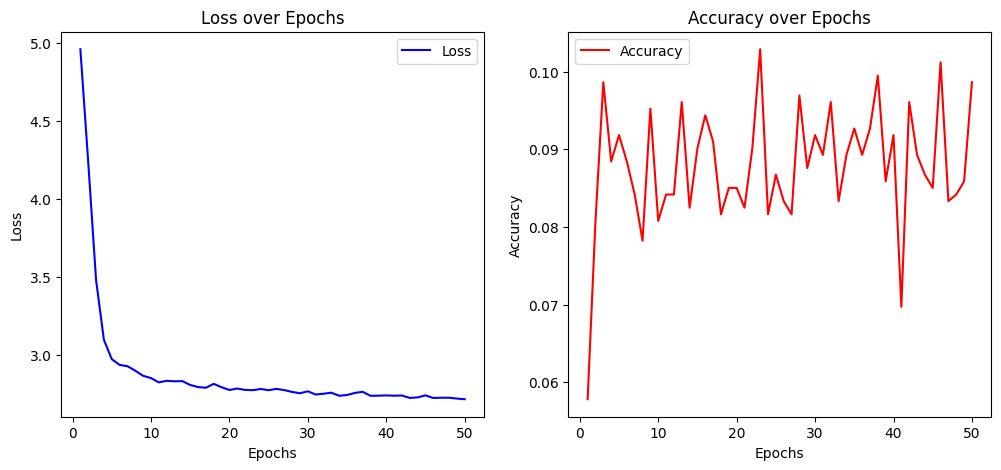

In [32]:
import matplotlib.pyplot as plt

# Assuming the model has been trained and 'history' is available

# Extract loss and accuracy from history
loss = history.history['loss']
accuracy = history.history['accuracy']
epochs = range(1, len(loss) + 1)

# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b-', label='Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r-', label='Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.show()


Epoch 1/50
37/37 - 1s - 32ms/step - accuracy: 0.0502 - loss: 5.3089 - val_accuracy: 0.0122 - val_loss: 6.5948
Epoch 2/50
37/37 - 0s - 7ms/step - accuracy: 0.0808 - loss: 4.4512 - val_accuracy: 0.0128 - val_loss: 7.5008
Epoch 3/50
37/37 - 0s - 6ms/step - accuracy: 0.1003 - loss: 3.7597 - val_accuracy: 0.0133 - val_loss: 8.5211
Epoch 4/50
37/37 - 0s - 7ms/step - accuracy: 0.1088 - loss: 3.1246 - val_accuracy: 0.0117 - val_loss: 8.8223
Epoch 5/50
37/37 - 0s - 7ms/step - accuracy: 0.0842 - loss: 2.9088 - val_accuracy: 0.0411 - val_loss: 8.4197
Epoch 6/50
37/37 - 0s - 8ms/step - accuracy: 0.0995 - loss: 2.7660 - val_accuracy: 0.0111 - val_loss: 8.5917
Epoch 7/50
37/37 - 0s - 6ms/step - accuracy: 0.0927 - loss: 2.7165 - val_accuracy: 0.0422 - val_loss: 8.4254
Epoch 8/50
37/37 - 0s - 6ms/step - accuracy: 0.0867 - loss: 2.6831 - val_accuracy: 0.0139 - val_loss: 8.2574
Epoch 9/50
37/37 - 0s - 7ms/step - accuracy: 0.0927 - loss: 2.6395 - val_accuracy: 0.0300 - val_loss: 8.3314
Epoch 10/50
37/37 

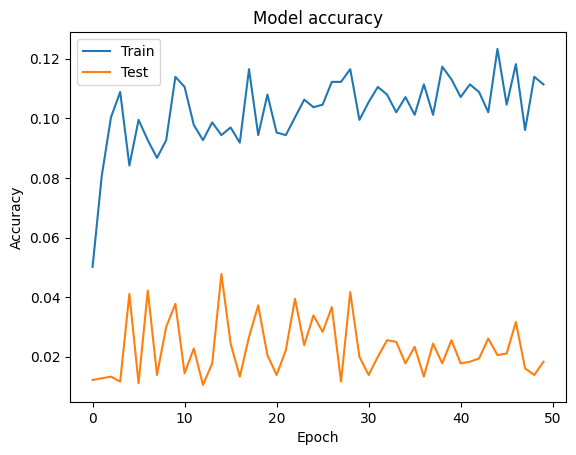

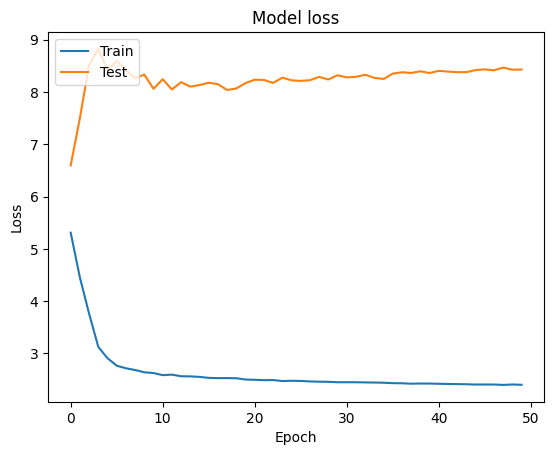

In [33]:
unique_words = list(set(unique_words + unique_words_test))

# Vocabulary size and word-to-index mapping
vocab_size = len(unique_words)
word_to_index = {word: idx for idx, word in enumerate(unique_words)}

# One-hot encoding function
def word_to_one_hot(word, word_to_index, vocab_size):
    one_hot_vector = np.zeros(vocab_size)
    one_hot_vector[word_to_index[word]] = 1
    return one_hot_vector

# Prepare training data
X_train = []
y_train = []

for input_word, context_word in context_pairs:
    X_train.append(word_to_one_hot(input_word, word_to_index, vocab_size))
    y_train.append(word_to_one_hot(context_word, word_to_index, vocab_size))

X_train = np.array(X_train)
y_train = np.array(y_train)

# Prepare test data
X_test = []
y_test = []

for input_word, context_word in context_test:
    X_test.append(word_to_one_hot(input_word, word_to_index, vocab_size))
    y_test.append(word_to_one_hot(context_word, word_to_index, vocab_size))

X_test = np.array(X_test)
y_test = np.array(y_test)

# Define the model with small random Gaussian weights
initializer = RandomNormal(mean=0.0, stddev=0.05)

model = Sequential([
    Input(shape=(vocab_size,)),
    Dense(200, activation='relu', kernel_initializer=initializer),  # Hidden layer
    Dense(vocab_size, activation='softmax', kernel_initializer=initializer)  # Output layer
])

# Compile the model with a large learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with validation data
history = model.fit(
    X_train, y_train, 
    epochs=50, 
    batch_size=32, 
    verbose=2, 
    validation_data=(X_test, y_test)
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


## Question 7

In [34]:
def get_embedding(one_hot_vector, model):
    # Extract the weights from the first layer (hidden layer)
    embedding_weights = model.layers[0].get_weights()[0]
    
    # Calculate the embedding by performing a dot product between the one-hot vector and the embedding weights
    embedding = np.dot(one_hot_vector, embedding_weights)
    
    return embedding

In [35]:
# Create a dictionary to store embeddings for each word
embeddings_dict = {}

# Loop through each word in the vocabulary
for word, index in word_to_index.items():
    # Create a one-hot vector for the current word
    one_hot_vector = np.zeros(vocab_size)
    one_hot_vector[index] = 1
    
    # Get the embedding using the get_embedding function
    embedding = get_embedding(one_hot_vector, model)
    
    # Store the embedding in the dictionary
    embeddings_dict[word] = embedding

# Display embeddings for all words
for word, embedding in embeddings_dict.items():
    print(f"Word: {word}, Embedding: {embedding}")


Word: or, Embedding: [-0.07156049  0.06103937 -0.02326937 -0.05106425  0.00300824 -0.01754902
  0.07882779  0.01461715  0.05160204 -0.04251447 -0.01761546  0.03967644
  0.01378494  0.07974878  0.00249223  0.02433914  0.05239925  0.07602199
  0.00338638 -0.0175988  -0.12334611  0.0202752  -0.02124989  0.03741407
  0.07329992  0.02106952 -0.01710914 -0.04861434 -0.0837864  -0.09666041
 -0.03835205  0.11231438 -0.02224522 -0.09947889 -0.03057101  0.12273138
  0.03827585 -0.00446051 -0.02304103 -0.07133611 -0.03273029  0.02840838
  0.00672712 -0.02054253 -0.07624026 -0.07437035  0.08319767 -0.00390279
  0.00540933 -0.03188271  0.11489315  0.06380134 -0.05024719 -0.00311383
  0.00809736 -0.03015492 -0.04847923  0.05058167 -0.00411674 -0.03736119
 -0.00810517  0.01408535 -0.04898236  0.00847661 -0.0405236  -0.10832875
 -0.07225312  0.0044054   0.07194063  0.01384797  0.09443328 -0.02668719
 -0.00563792  0.0262731   0.0087805   0.0281668  -0.00201465 -0.02277534
  0.00582673 -0.03438348  0.03